# Import

In [ ]:
!pip install --upgrade -q accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.3 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-8dm3ctmb
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-8dm3ctmb
  Resolved https://github.com/huggingface/transformers.git to commit 92c5ca9dd70de3ade2af2eb835c96215cc50e815
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.50.0.dev0-py3-none-any.whl size=10849200 sha256=1ad02d81d3ea47eaa0b248a9fc337a4db0b3f8fadd6ef3be5c321f7cec28c0d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-l6zxk1iz/wheels/32/4b/78/f195c684dd3a9ed21f3b39fe8f85b48df7918581b6437be143
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3


In [ ]:
!pip install ninja
!pip install openai
import gdown
import numpy as np
from PIL import Image
import IPython
import os
import sys
import cv2
import numpy as np
import torch
from torch.utils.data import DataLoader
!pip install ultralytics
from ultralytics import YOLO
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
from google.colab import files
import shutil
import gc
import re
import subprocess
from transformers import AutoProcessor, LlavaForConditionalGeneration
from transformers import BitsAndBytesConfig
import torch
import openai
from openai import OpenAI

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 44.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 모델 준비

In [ ]:
''' yolo 모델 준비 '''
yolo_weights_path = "/content/drive/MyDrive/KUBIG/fashion_review/yolo_best_weights.pt"
model_yolo = YOLO(yolo_weights_path)

In [ ]:
'''LLaVA 모델 준비'''

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)
model_id = "llava-hf/llava-1.5-7b-hf"

processor = AutoProcessor.from_pretrained(model_id)
model = LlavaForConditionalGeneration.from_pretrained(model_id, quantization_config=quantization_config, device_map="auto")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [ ]:
''' ACGPN 모델 준비 '''

# ACGPN 폴더로 이동
base_path = "/content/drive/MyDrive/KUBIG/fashion_review/ACGPN"
os.chdir(base_path)
print(f"Current Directory: {os.getcwd()}")
from predict_pose import generate_pose_keypoints

# GPU 메모리 확보
#torch.cuda.empty_cache()
#gc.collect()

''' u2net 모델 불러오기 '''
os.chdir(os.path.join(base_path, "U-2-Net"))
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')

os.chdir("/content/drive/MyDrive/KUBIG/fashion_review")

Current Directory: /content/drive/MyDrive/KUBIG/fashion_review/ACGPN
...load U2NEP---4.7 MB


# 함수들

## sanitize_filename

In [ ]:
def sanitize_filename(filename):
    """ 파일명에서 한글, 공백, 특수문자 제거 후 영문+숫자로만 변경 """
    filename = filename.replace(" ", "_")  # 공백을 언더스코어(_)로 변경
    filename = re.sub(r"[가-힣]", "", filename)  # 한글 제거
    filename = re.sub(r"[^\w.-]", "", filename)  # 영문, 숫자, 밑줄(_), 점(.)만 남김
    return filename

## acgpn

In [27]:
def acgpn():
    os.chdir(base_path)

    cloth_folder = os.path.join(base_path, "inputs/cloth")
    img_folder = os.path.join(base_path, "inputs/img")

    ''' inputs 폴더 초기화 '''
    for folder in [cloth_folder, img_folder]:
        if os.path.exists(folder):
            for file in os.listdir(folder):
                os.remove(os.path.join(folder, file))

    for folder in [cloth_folder, img_folder]:
        print(f"Uploading to: {folder}")
        if folder == cloth_folder:
            print("👕 옷 이미지를 업로드해주세요.")
        elif folder == img_folder:
            print("🙋‍♀️ 본인 이미지를 업로드해주세요.")
        uploaded = files.upload()
        # 업로드된 파일을 직접 저장
        for filename, file_data in uploaded.items():
            new_filename = sanitize_filename(filename)
            save_path = os.path.join(folder, new_filename)
            with open(save_path, "wb") as f:
                f.write(file_data)
            print(f"Saved: {save_path}")

    os.chdir(base_path)  # ACGPN 폴더로 되돌아옴
    print("All images uploaded successfully.")

    ''' 옷에 대해 전처리 '''
    # test_color 폴더를 초기화하여 기존 이미지 삭제
    test_color_folder = "Data_preprocessing/test_color"
    # test_edge 폴더를 초기화하여 기존 이미지 삭제
    test_edge_folder = "Data_preprocessing/test_edge"
    for folder in [test_color_folder, test_edge_folder]:
        if os.path.exists(folder):
            for file in os.listdir(folder):
                os.remove(os.path.join(folder, file))

    # 업로드된 옷 이미지에서 가장 최신 파일 선택
    cloth_name = sorted(os.listdir(cloth_folder))[-1]
    cloth_path = os.path.join(cloth_folder, cloth_name)

    # 이미지를 (192, 256) 크기로 BICUBIC 보간법을 사용하여 리사이징합니다.
    cloth = Image.open(cloth_path).resize((192, 256), Image.BICUBIC).convert('RGB')
    cloth.save(os.path.join(test_color_folder, cloth_name))

    # U^2-Net은 주로 이미지의 경계를 추출하는데 사용되는 모델이므로,
    # 입력 의류 이미지의 실루엣이나 윤곽선을 추출하는 과정
    u2net_run.infer(u2net, test_color_folder, test_edge_folder)

    ''' 사람에 대해 전처리 '''
    test_img_folder = "Data_preprocessing/test_img"
    test_label_folder = "Data_preprocessing/test_label"
    test_pose_folder = "Data_preprocessing/test_pose"
    for folder in [test_img_folder, test_label_folder, test_pose_folder]:
        if os.path.exists(folder):
            for file in os.listdir(folder):
                os.remove(os.path.join(folder, file))

    # 업로드된 사람 이미지에서 가장 최신 파일 선택
    img_name = sorted(os.listdir(img_folder))[-1]
    img_path = os.path.join(img_folder, img_name)
    img = Image.open(img_path).resize((192,256), Image.BICUBIC)
    img.save(os.path.join(test_img_folder, img_name))
    print('✅Image resized')  # 리사이징 완료

    # Self-Correction Human Parsing(SCHP) 모델을 사용하여 인체 부위 분석
    #!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
    os.system("python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'")
    print('✅Parsing generated')
    # pose keypoints 생성 (자세 정보 추출)
    pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
    generate_pose_keypoints(img_path, pose_path)
    print('✅Pose map generated')

    os.remove("Data_preprocessing/test_pairs.txt") if os.path.exists("Data_preprocessing/test_pairs.txt") else None
    with open('Data_preprocessing/test_pairs.txt', 'w') as f:
        f.write(f'{img_name} {cloth_name}')

    os.system("chmod +x test.py")
    result = subprocess.run(["python3", "test.py"], capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)  # 오류 발생 시 출력

    result_path = f'/content/drive/MyDrive/KUBIG/fashion_review/ACGPN/results/test/try-on/{img_name}'

    ''' 결과 시각화 '''
    # 업로드 후 리사이징된 사람 이미지 불러오기
    img1 = Image.open(f'Data_preprocessing/test_img/{img_name}').convert('RGB').resize((192, 256))
    # 업로드 후 리사이징된 옷 이미지 불러오기
    img2 = Image.open(f'Data_preprocessing/test_color/{cloth_name}').convert('RGB').resize((192, 256))
    # 가상 피팅된 결과 이미지 불러오기
    img3 = Image.open(f'results/test/try-on/{img_name}').convert('RGB').resize((192, 256))
    # NumPy 배열 변환
    img1_array = np.array(img1, dtype=np.uint8)
    img2_array = np.array(img2, dtype=np.uint8)
    img3_array = np.array(img3, dtype=np.uint8)
    # 이미지 배열을 좌우로 연결
    output_grid = np.concatenate([img1_array, img2_array, img3_array], axis=1)
    # 다시 이미지로 변환 후 출력
    image_grid = Image.fromarray(output_grid)

    os.chdir("/content/drive/MyDrive/KUBIG/fashion_review")

    # cloth_path는 가상 피팅이 제대로 안 되어 객체 탐지가 안 될 때 사용
    return image_grid, result_path, cloth_path

## crop_by_polygon_mask

In [28]:
# 폴리곤 좌표대로 cropping
# image_path : 원본 이미지 경로
# polygon_points : 폴리곤 좌표 (test 결과 넣으면 될 듯)
def crop_by_polygon_mask(image_path, polygon_points):
    image = cv2.imread(image_path)
    if image is None:
        print(f"이미지 로드 실패: {image_path}")
        return None
    h, w = image.shape[:2]

    # BGR -> BGRA (알파 채널 추가)
    image_rgba = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

    # 마스크 생성
    mask = np.zeros((h,w), dtype=np.uint8)

    # 폴리곤 좌표를 numpy 배열로 변환
    pts = np.array([polygon_points], dtype=np.int32)
    cv2.fillPoly(mask, pts, 255)

    # 마스크 적용
    image_rgba[:,:,3] = mask

    return image_rgba

## fashion_captioning

In [29]:
def fashion_captioning(img_path):
    # 이미지 로드 (RGBA로 변환하여 마스크 유지)
    raw_image = Image.open(img_path).convert('RGBA')

    # 알파 채널(마스크) 분리
    img_array = np.array(raw_image)
    if img_array.shape[-1] == 4:  # RGBA 형식인 경우
        mask = img_array[:, :, 3]  # 알파 채널 가져오기 (0: 완전 투명, 255: 불투명)

        # 마스크 적용: 배경을 흰색(255,255,255)으로 변경
        img_array[:, :, :3][mask == 0] = [255, 255, 255]

        # RGBA → RGB 변환 (마스크 적용된 이미지 생성)
        masked_image = Image.fromarray(img_array[:, :, :3])  # RGB만 유지
    else:
        masked_image = raw_image.convert('RGB')  # 알파 채널 없을 경우

    captions = []

    q1 = "USER: <image>\nWhat type of fit and length does this clothing have? (e.g., oversized, slim, cropped)\nASSISTANT:"
    q2 = "USER: <image>\nDescribe the color of this clothing.\nASSISTANT:"
    q3 = "USER: <image>\nDescribe the design of this clothing. (e.g., patterns, prints, style)\nASSISTANT:"
    q4 = "USER: <image>\nWhat material is this clothing made of?\nASSISTANT:"
    q5 = "USER: <image>\nWhat season is this clothing suitable for?\nASSISTANT:"

    for q in [q1, q2, q3, q4, q5]:
        print('❓:', q)

        inputs = processor(images=masked_image,
                           text=q,
                           padding=True, return_tensors="pt")
        inputs = {k: v.to("cuda") for k, v in inputs.items()}

        output = model.generate(**inputs, max_new_tokens=70)
        generated_text = processor.batch_decode(output, skip_special_tokens=True)[0]
        response = generated_text.split("ASSISTANT:")[-1].strip()  # "Answer:" 이후 부분만 출력

        captions.append(response)
        print('💬:', response)
    return masked_image, captions

## generate_clothing_review

In [36]:
key = ""
client = OpenAI(api_key=key)

def generate_clothing_review(caption: list, user_data: dict):
    prompt = "fit and length of the cloth : " + caption[0] + "\n"
    prompt += "color of the cloth : " + caption[1] + "\n"
    prompt += "design of the cloth : " + caption[2] + "\n"
    prompt += "material of the cloth : " + caption[3] + "\n"
    prompt += "suitable season of the cloth : " + caption[4] + "\n"
    prompt += "Using these as the context, write a review of the cloth. if the satisfaction level of the user is lower than 50, you should use this context as negative things and critize about it. Please. \n"
    prompt += "추가로, 영어단어를 최대한 발음 그대로 말고 한글 뜻으로 풀어서 적어줘. (예 : 네크라인 -> 목라인) 하지만 한글로 이미 관용적으로 쓰는 표현(예 : 포인트, 데이트, 핏 등)은 그대로 두는 게 좋아."
    prompt += "리뷰 처음 부분에 어떤 옷인지 설명하는 부분, 예를 들어 '이 레드 드레스는'과 같은 부분은 생략해도 좋아."

    print("Prompt:\n", prompt)

    # 사용자 데이터를 포함한 요청
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "system",
                "content": f"""Here are the user's personal information.
                Tone of Speech: {user_data['tone']}
                Fit: {user_data['fit']}
                Satisfaction: {user_data['satisfaction']} (0 = Very Unsatisfied, 100 = Very Satisfied)

                Use this information to generate a review that aligns with the user's speech style.
                The review should feel natural and match their personal satisfaction level and fit experience.
                (if the level is under 50, you should use the context of the cloth negatively and criticize about it.)
                And don't need to use all the information.
                Please write it in a way that sounds like it was written by a person, using the following examples as a reference.

                톤이 '평범함' 일 때 예시 1: 적당히 두께감 있어서 간절기 동안 잘 입었습니다. 이제는 추워져서 이너로 활용해야할거 같아요. 적당한 오버핏이라 아우터 안에 입기 좋을거 같아요.
                톤이 '평범함' 일 때의 예시 2: 초등학생 때 이후로 다시 처음 사네요 그때랑 비슷한 거 같습니다 핏은 훨씬 트렌디하게 나왔네요 야무지게 아무 데나 걸쳐도 예쁜 템입니다 같은 옷 입은 사람 하루에 스무 명 이상 마주치지만요 ..
                톤이 '평범함' 일 때의 예시 3: 핏이 너무 예쁘고 두께도 딱이어서 입문용으로 추천합니다 브라운이랑 고민하다 코디하기 쉽게 블랙주문했는데 후회없어요
                톤이 '애교 있음'일 때의 예시 1 : 아메카지나 시티보이룩 뭐 이런 느낌 좋아하구, 핀턱 와이드 팬츠 꾸안꾸로 입는거 좋아하면 정말 만족하는 제품일것 같아요 ! 고민 많이 하다가 구매했는데 배송받고 입어본 다음에 왜 일찍 안시켰는지 후회했어요.. 존예입니다😯 깔별로 구매하고싶어요 아! 그리고 평소 크게 입으시는 분들도 그냥 정싸이즈 시켜도 될것 같아요 ! 원래 L입는데 품절되는 바람에 M시켰는데 L시켰으면 큰일 날뻔 했습니더.... 허허
                톤이 '애교 있음'일 때의 예시 2 : 진짜 저 어깨도 좀 넓고 덩치도 있는 편이라 오픈숄더 입으면 너무 이상해 보일까봐 걱정하면서 구매했는데 사.... 이거 뭐에요?? 입자마자 언니랑 엄마가 옷 잘 샀다고 너무 이쁘다고 칭찬하더라구여ㅠㅠ 제 인생 첫 오픈숄더 잘 입겠습니다ㅠㅠ🥰
                톤이 '애교 있음'일 때의 예시 3 : 가슴쪽에 면이 하나 더 있어서 브라 라인 비치는게없어서 좋아용 ㅎㅎ 어깨 퍼프도 부담스럽지않게있어서좋구요! 면도 재질도 부들부들 ...!! 제가 근데 요 근래에 살이 쪄서그런지 .. 쫌 딱맞네요 ㅎㅎㅎㅎㅎㅎㅎㅎ 그래도이뻐용🖤
                """
            },
            {"role": "user", "content": prompt}  # 주어진 리뷰 생성용 프롬프트
        ]
    )

    # 1차 리뷰 출력
    review_text = response.choices[0].message.content
    review_text = review_text.replace('\n\n','')
    print("Generated Review:\n", review_text)

    # 사용자 피드백 입력 받기
    feedback = input("\n수정이 필요하면 원하는 변경 사항을 입력해주세요 (없는 경우 Enter 키를 눌러주세요): ")

    if feedback.strip():  # 피드백이 있을 경우 반영하여 수정
        revised_response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {
                    "role": "system",
                    "content": f"Modify the review based on the user's feedback while keeping the original style and structure and tone. Don't forget : Tone of Speech: {user_data['tone']}"
                },
                {"role": "assistant", "content": review_text},  # 기존 리뷰 제공
                {"role": "user", "content": feedback}  # 사용자 피드백 반영 요청
            ]
        )
        revised_review = revised_response.choices[0].message.content
        print("\nRevised Review:\n", revised_review)
        revised_review = revised_review.replace('\n\n', '')
        return revised_review
    else:
        review_text = review_text.replace('\n\n', '')
        return review_text

## main

In [38]:
# virtual_tryon: True이면 가상 피팅 이미지 생성
def main(user_data, virtual_tryon = False):

    if virtual_tryon:
        image_grid, img_path, cloth_path = acgpn()
    else:
        image_grid = None
        # 이미지 업로드
        uploaded = files.upload()
        upload_folder = "/content/drive/MyDrive/KUBIG/fashion_review/uploaded_images"
        os.makedirs(upload_folder, exist_ok=True)  # 폴더 없으면 생성

        # 한 장의 이미지만 업로드 허용
        filename = list(uploaded.keys())[0]
        file_path = os.path.join(upload_folder, filename)
        with open(file_path, "wb") as f:
            f.write(uploaded[filename])
        print(f"✅ Saved: {file_path}")

        img_path = file_path

    category_input = input("""
    리뷰를 작성하고 싶은 옷의 숫자를 입력하세요. 여러 개를 입력하려면 쉼표로 구분하세요.\n
    0: '상의-니트웨어', 1: '상의-브라탑', 2: '상의-블라우스', 3: '상의-셔츠', 4: '상의-탑', 5: '상의-티셔츠', 6: '상의-후드티',\n
    7: '아우터-가디건', 8: '아우터-베스트', 9: '아우터-재킷', 10: '아우터-점퍼', 11: '아우터-짚업', 12: '아우터-코트', 13: '아우터-패딩',\n
    14: '원피스-드레스', 15: '원피스-점프수트',\n
    16: '하의-래깅스', 17: '하의-스커트', 18: '하의-조거팬츠', 19: '하의-청바지', 20: '하의-팬츠'\n
    """)
    category = set(map(int, category_input.split(',')))

    # segmentation 실행
    # confidence 25% 이상인 객체만 감지
    results = model_yolo.predict(source=img_path, save=False, show=False, conf=0.25)

    # 가상 피팅 실행 시 감지된 객체가 없을 경우 처리
    if virtual_tryon and (not results or len(results[0].boxes) == 0):
        print("❌ 가상 피팅이 제대로 되지 않았습니다. 옷 이미지만 사용합니다.")
        img_path = cloth_path
        results = model_yolo.predict(source=img_path, save=False, show=False, conf=0.25)

    # 감지된 객체가 그려진 이미지를 저장할 폴더
    output_folder = "/content/drive/MyDrive/KUBIG/fashion_review/output_mask"
    # 크롭된 객체를 저장할 폴더
    cropped_folder = "/content/drive/MyDrive/KUBIG/fashion_review/output_mask/cropped_images"
    os.makedirs(output_folder, exist_ok=True)
    os.makedirs(cropped_folder, exist_ok=True)

    # result는 하나의 이미지에 대한 객체 감지 결과를 나타낸다
    for result in results:
        # 감지된 객체를 이미지 위에 시각적으로 표현
        annotated_img = result.plot()
        # 원본 이미지 경로
        image_path = result.path
        # image_path에서 파일명만 추출
        filename = os.path.basename(image_path)
        # output_folder에 감지된 객체가 그려진 이미지를 저장
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, annotated_img)
        print(f"저장 완료: {save_path}")

        # 객체가 감지된 경우(result.masks가 None이 아님) 각 객체별로 반복문 실행
        # result.masks.xy: 감지된 객체들의 마스크 폴리곤 좌표 리스트.
        # enumerate를 사용해 객체 인덱스 i와 해당 마스크 좌표 mask를 가져온다.
        for i, mask in enumerate(result.masks.xy if result.masks is not None else []):
            # 현재 객체 i의 카테고리 인덱스
            object_category_idx = int(result.boxes.cls[i].item())
            # 현재 객체 i의 카테고리 이름
            object_category_name = result.names[object_category_idx]

            if object_category_idx not in category:
                continue

            # 객체의 폴리곤 좌표 리스트
            polygon_points = [(int(x), int(y)) for (x, y) in mask]
            # 좌표 개수가 2개 이하라면 폴리곤을 만들 수 없으므로 크롭을 안 한다
            if len(polygon_points) > 2:
                # 객체 영역을 크롭
                rgb_image = crop_by_polygon_mask(image_path, polygon_points)
                if rgb_image is not None:
                    # 크롭된 객체를 cropped_images 폴더에 저장
                    png_filename = filename.replace(".jpg", f"_{object_category_idx}_mask.png").replace(".png", f"_{object_category_idx}_mask.png")
                    save_path_rgba = os.path.join(cropped_folder, png_filename)
                    cv2.imwrite(save_path_rgba, rgb_image)
                    print(f"저장 완료(RGBA mask) : {save_path_rgba}")

    print("✅segmentation 완료")

    masked_image, captions = fashion_captioning(save_path_rgba)

    review = generate_clothing_review(captions, user_data)

    return image_grid, results, masked_image, captions, review

# TEST

## 가상 피팅 안 하는 경우

In [39]:
user_data = {
    "tone": "애교 있음",
    "fit": "잘 맞아요",
    "satisfaction": 90
}

image_grid, results, masked_image, captions, review = main(user_data, virtual_tryon = False)

Saving 스크린샷 2025-02-22 231522.png to 스크린샷 2025-02-22 231522.png
✅ Saved: /content/drive/MyDrive/KUBIG/fashion_review/uploaded_images/스크린샷 2025-02-22 231522.png

    리뷰를 작성하고 싶은 옷의 숫자를 입력하세요. 여러 개를 입력하려면 쉼표로 구분하세요.

    0: '상의-니트웨어', 1: '상의-브라탑', 2: '상의-블라우스', 3: '상의-셔츠', 4: '상의-탑', 5: '상의-티셔츠', 6: '상의-후드티',

    7: '아우터-가디건', 8: '아우터-베스트', 9: '아우터-재킷', 10: '아우터-점퍼', 11: '아우터-짚업', 12: '아우터-코트', 13: '아우터-패딩',

    14: '원피스-드레스', 15: '원피스-점프수트',

    16: '하의-래깅스', 17: '하의-스커트', 18: '하의-조거팬츠', 19: '하의-청바지', 20: '하의-팬츠'

    2,3,5

image 1/1 /content/drive/MyDrive/KUBIG/fashion_review/uploaded_images/스크린샷 2025-02-22 231522.png: 640x384 1 상의-셔츠, 48.5ms
Speed: 3.1ms preprocess, 48.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 384)
저장 완료: /content/drive/MyDrive/KUBIG/fashion_review/output_mask/스크린샷 2025-02-22 231522.png
저장 완료(RGBA mask) : /content/drive/MyDrive/KUBIG/fashion_review/output_mask/cropped_images/스크린샷 2025-02-22 231522_3_mask.png
✅segmentation 완료
❓: USER: <image>


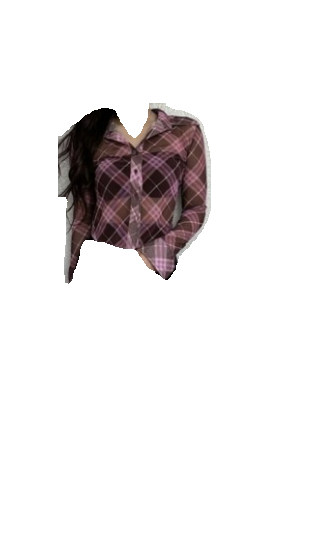

In [ ]:
masked_image

In [ ]:
captions

['The clothing in the image is described as having a cropped fit and a short length. This means that the clothing is not oversized or slim, but rather a more fitted and shorter version of the original design. The woman in the image is wearing a cropped shirt, which is a shorter version of a regular sh',
 'The color of the clothing is pink.',
 'The clothing in the image features a plaid pattern, which gives it a casual and stylish appearance. The woman is wearing a plaid shirt, and the design complements her overall look. The plaid pattern adds a touch of sophistication and character to the outfit, making it a fashionable choice for various',
 'The clothing in the image is made of plaid fabric.',
 'The clothing in the image, which includes a plaid shirt and a checkered shirt, is suitable for the fall and winter seasons. These patterns are often associated with colder weather and can provide warmth and comfort during the colder months.']

## 가상 피팅 하는 경우

### 가상 피팅 이미지에서 객체 탐지 가능한 경우

In [ ]:
image_grid, results, masked_image, captions = main(virtual_tryon = True)

Uploading to: /content/drive/MyDrive/KUBIG/fashion_review/ACGPN/inputs/cloth
👕 옷 이미지를 업로드해주세요.


Saving 스크린샷 2025-02-22 232445.png to 스크린샷 2025-02-22 232445 (1).png
Saved: /content/drive/MyDrive/KUBIG/fashion_review/ACGPN/inputs/cloth/_2025-02-22_232445_1.png
Uploading to: /content/drive/MyDrive/KUBIG/fashion_review/ACGPN/inputs/img
🙋‍♀️ 본인 이미지를 업로드해주세요.


Saving 스크린샷 2025-02-22 232657.png to 스크린샷 2025-02-22 232657 (1).png
Saved: /content/drive/MyDrive/KUBIG/fashion_review/ACGPN/inputs/img/_2025-02-22_232657_1.png
All images uploaded successfully.
Generating mask for: _2025-02-22_232445_1.png
Saving output at Data_preprocessing/test_edge/_2025-02-22_232445_1.png
✅Image resized
✅Parsing generated
File saved at Data_preprocessing/test_pose/_2025-02-22_232657_1_keypoints.json
✅Pose map generated
?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter

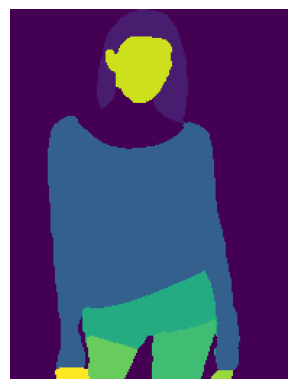

In [ ]:
img = Image.open("/content/drive/MyDrive/KUBIG/fashion_review/ACGPN/Data_preprocessing/test_label/_2025-02-22_232657_1.png")
from matplotlib import pyplot as plt
plt.imshow(img)  # 흑백 마스크일 경우 cmap 설정
plt.axis("off")
plt.show()

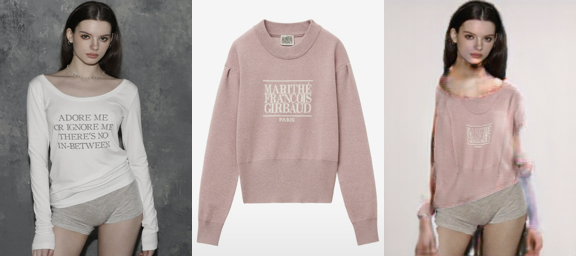

In [ ]:
image_grid

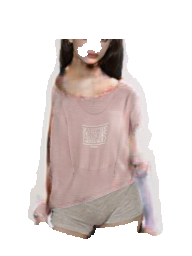

In [ ]:
masked_image

### 가상 피팅 이미지에서 객체 탐지 불가한 경우

In [ ]:
image_grid, results, masked_image, captions = main(virtual_tryon = True)

Uploading to: /content/drive/MyDrive/KUBIG/fashion_review/ACGPN/inputs/cloth
👕 옷 이미지를 업로드해주세요.


Saving 스크린샷 2025-02-22 223536.png to 스크린샷 2025-02-22 223536 (7).png
Saved: /content/drive/MyDrive/KUBIG/fashion_review/ACGPN/inputs/cloth/_2025-02-22_223536_7.png
Uploading to: /content/drive/MyDrive/KUBIG/fashion_review/ACGPN/inputs/img
🙋‍♀️ 본인 이미지를 업로드해주세요.


Saving 스크린샷 2025-02-22 223635.png to 스크린샷 2025-02-22 223635 (5).png
Saved: /content/drive/MyDrive/KUBIG/fashion_review/ACGPN/inputs/img/_2025-02-22_223635_5.png
All images uploaded successfully.
Generating mask for: _2025-02-22_223536_7.png
Saving output at Data_preprocessing/test_edge/_2025-02-22_223536_7.png
✅Image resized
✅Parsing generated
File saved at Data_preprocessing/test_pose/_2025-02-22_223635_5_keypoints.json
✅Pose map generated
?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter

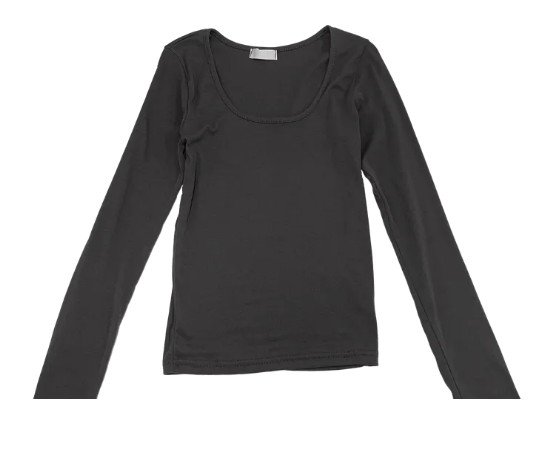

In [ ]:
masked_image

In [ ]:
captions

['The clothing in the image is a black shirt with a cropped fit.',
 'The color of this clothing is black.',
 'The clothing in the image is a black shirt with a silver zipper. The shirt has a simple design, with no visible patterns or prints. The focus is on the black color and the silver zipper, which adds a touch of elegance to the overall appearance.',
 'The clothing in the image is made of a knit material.',
 'The clothing in the image is a black shirt with a silver zipper. It is suitable for all seasons, as it is a simple and versatile garment that can be worn in various weather conditions. The black color of the shirt also makes it a good choice for colder seasons, as it can help retain body heat.']